In [31]:
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.markers import MarkerStyle as markerstyle
import math
from scipy.interpolate import griddata
import pandas
from scipy import constants
import matplotlib.patches as patches
import matplotlib.cm as cm
import seaborn as sns

In [32]:
#Energies_File
euler_file = "../3D_Martini2/EulerAngles_dataMg.txt"
dist_file = "../3D_Martini2/Final_data_100NaCl.txt"

euler_data = pandas.read_csv(euler_file,comment='#',sep='\t',dtype=np.float64)   #Reweighted Energy file
dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file


#Remove duplicates 
dist_data = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)
euler_data = euler_data.drop_duplicates(subset=['Timestep'],ignore_index=True)


#Special filtering for master data 
# mask1 = (dist_data['Timestep']%20000 == 0)
# dist_data02 = dist_data[::10]
# mask2 = (euler_data['Timestep']%20000 == 0)
# euler_data02 = euler_data[::10]

#Merge two dataframes
master_data3D = dist_data.join(euler_data.set_index('Timestep'),on='Timestep',how='inner',lsuffix = '_dist',rsuffix = '_elr')
#Change the arc tan values to a range from 0 tp 2pi
# for col in ['RollA', 'RollB','YawA','YawB']:
#     master_data3D[col][master_data3D[col] < 0] = master_data3D[col][master_data3D[col] < 0] + 2*np.pi

# #Remove instances where protein came off membrane 
# timesteps_array = master_data3D['Timestep']/1e6
# mask1 = (timesteps_array < 50.0)

# # mask1 = master_data3D['PitchA'] == 0.0
# master_data3D = master_data3D[mask1]

In [3]:
print(len(dist_data['Timestep']))
print(master_data3D['PitchA'])

525001
0        0.043707
1        0.016900
2        0.015084
3        0.007007
4        0.008964
           ...   
59996   -1.127222
59997   -1.131200
59998   -1.136950
59999   -1.160312
60000   -1.124655
Name: PitchA, Length: 60001, dtype: float64


In [33]:
#Energies_File
euler_file = "../2D_Martini2/EulerAngles_dataMg.txt"
dist_file = "../2D_Martini2/Final_parameter_data.txt"

euler_data = pandas.read_csv(euler_file,comment='#',sep='\t',dtype=np.float64)   #Reweighted Energy file
dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file


#Remove duplicates 
dist_data = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)
euler_data = euler_data.drop_duplicates(subset=['Timestep'],ignore_index=True)

#Merge two dataframes
master_data2D = dist_data.join(euler_data.set_index('Timestep'),on='Timestep',how='inner',lsuffix = '_dist',rsuffix = '_elr')

#Remove instances where protein came off membrane 
timesteps_array = master_data2D['Timestep']/1e6

# mask1 = (timesteps_array < 50.0) & (timesteps_array > 25)
# mask1 = master_data2D['End2ENdA'] > 8.5
# master_data2D = master_data2D[mask1]



In [34]:
#Energies_File
euler_file = "../PseudoMart2/EulerAngles_dataMg.txt"
dist_file = "../PseudoMart2/Final_data.txt"

euler_data = pandas.read_csv(euler_file,comment='#',sep='\t',dtype=np.float64)   #Reweighted Energy file
dist_data = pandas.read_csv(dist_file,comment='#',sep='\t',dtype=np.float64)   #Distance file


#Remove duplicates 
dist_data = dist_data.drop_duplicates(subset=['Timestep'],ignore_index=True)
euler_data = euler_data.drop_duplicates(subset=['Timestep'],ignore_index=True)

#Merge two dataframes
master_data_pseudo = dist_data.join(euler_data.set_index('Timestep'),on='Timestep',how='inner',lsuffix = '_dist',rsuffix = '_elr')

#Remove instances where protein came off membrane 
timesteps_array = master_data2D['Timestep']/1e6

# mask1 = (timesteps_array < 50.0) & (timesteps_array > 25)
# mask1 = master_data2D['End2ENdA'] > 8.5
# master_data2D = master_data2D[mask1]



## Plotting distributions for chain A and chain B

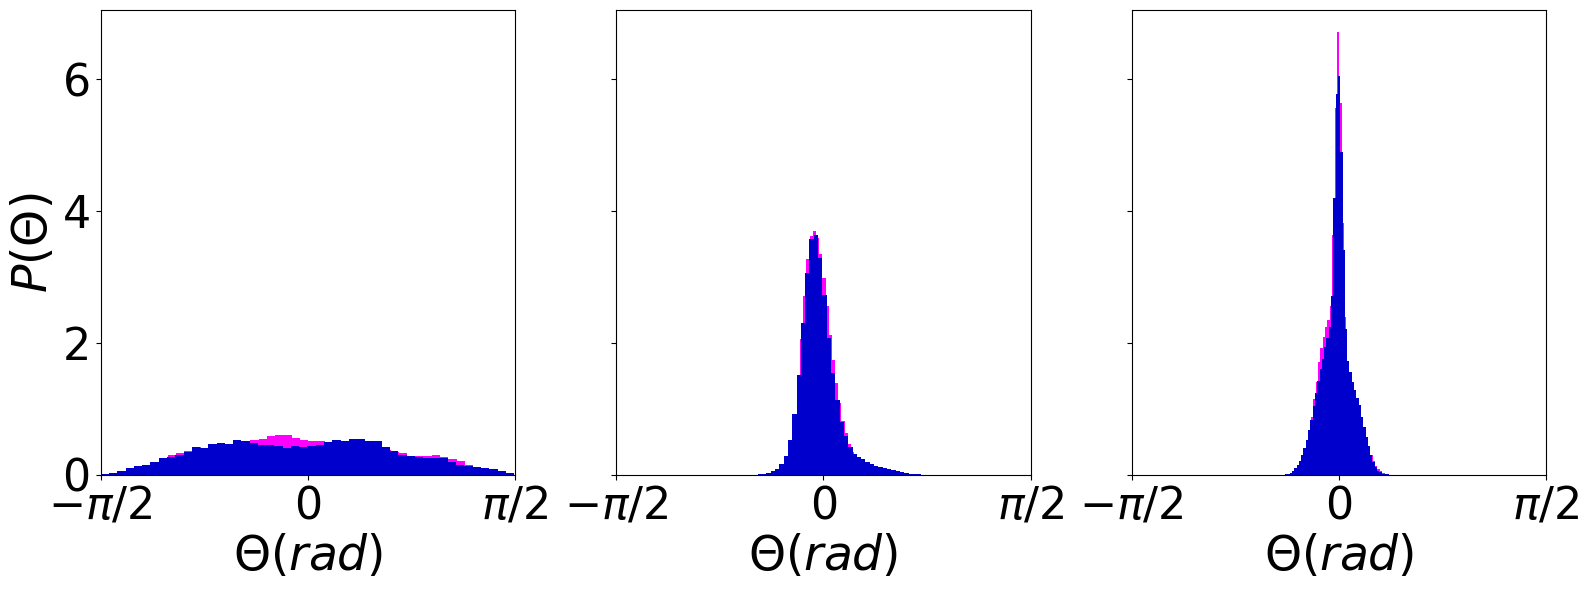

In [35]:
fig,ax = plt.subplots(1,3,figsize=(16,6),sharey=True)

nbins=50
al=1.0
f_size=34
t_size = 32
leg_size=20

cl2 = 'mediumblue'
cl1='magenta'

#Plot 3D data
ax[0].hist(master_data3D['PitchA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(master_data3D['PitchB'],bins=nbins,density=True,alpha=al,color=cl2)
# ax[0].set_yticks([0,0.3,0.6])

ax[1].hist(master_data2D['PitchA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
ax[1].hist(master_data2D['PitchB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')

ax[2].hist(master_data_pseudo['PitchA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
ax[2].hist(master_data_pseudo['PitchB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')



ax[1].set_yticks([0,2,4,6])


# ax[1].legend(fontsize=leg_size,frameon=False,loc='upper right')

ax[0].set_ylabel(r'$ P(\Theta)$',fontsize=f_size)
for ax_ in ax:
    ax_.set_xlabel(r'$ \Theta (rad)$',fontsize=f_size)
    # ax_.set_ylabel(r'$ P(\Theta)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
    ax_.set_xlim(-math.pi/2,math.pi/2)
    # ax_.set_xticks([-math.pi/2,-math.pi/4,0,math.pi/4,math.pi/2])
    ax_.set_xticks([-math.pi/2,0,math.pi/2])
    # ax_.set_xticklabels([r'$-\pi/{2}$',r'$-\pi/{4}$',r'$0$',r'$\pi/{4}$',r'$\pi/{2}$'])
    ax_.set_xticklabels([r'$-\pi/{2}$',r'$0$',r'$\pi/{2}$'])
fig.tight_layout()

# plt.savefig('Pitch_Mart2_FINAL.eps', dpi=600,format='eps',transparent=True)
# plt.savefig('Pitch_Mart2_FINAL.png', dpi=600,format='png',transparent=True)


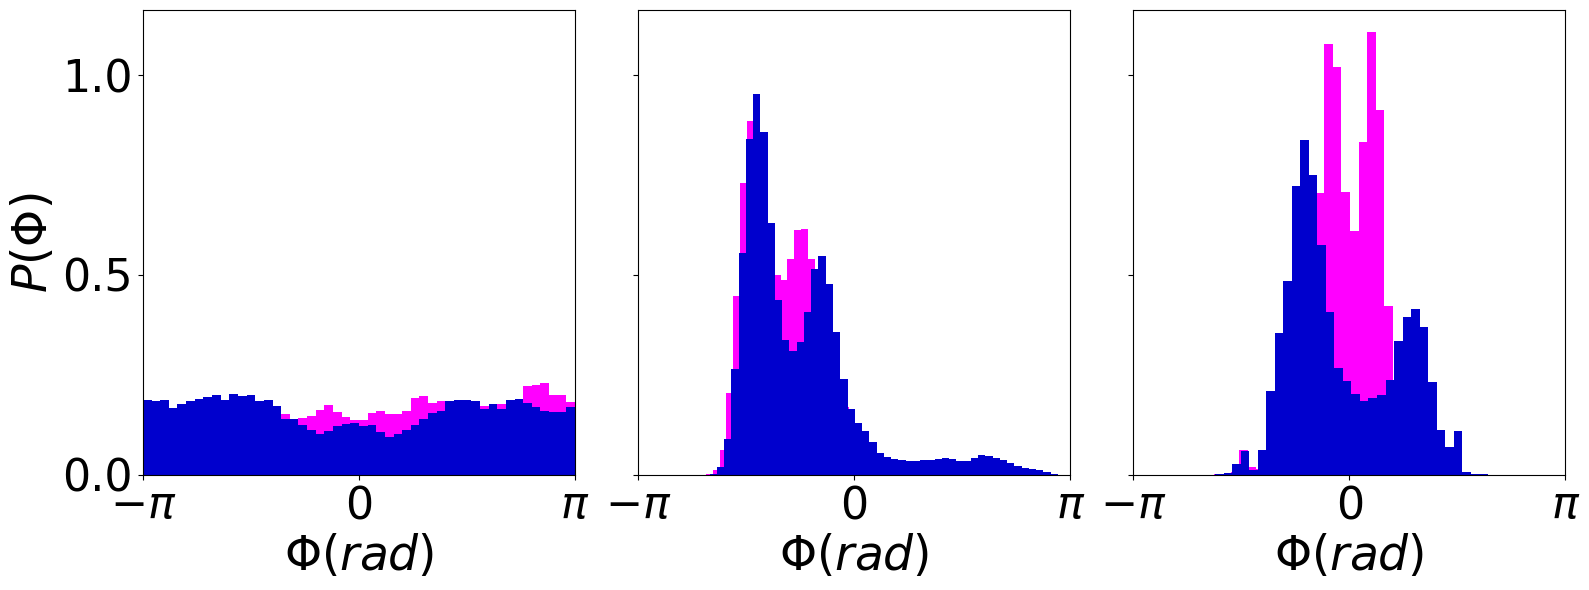

In [36]:
fig,ax = plt.subplots(1,3,figsize=(16,6),sharey=True)

nbins=50
al=1.0
f_size=34
t_size = 32
leg_size=20

# cl2 = 'midnightblue'
# cl1='maroon'

#Plot 3D data
ax[0].hist(master_data3D['RollA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(master_data3D['RollB'],bins=nbins,density=True,alpha=al,color=cl2)
# ax[0].set_yticks([0,0.1,0.2])
# ax[0].ticklabel_format(axis='y',style='sci',scilimits=(-1,0))
ax[1].hist(master_data2D['RollA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
ax[1].hist(master_data2D['RollB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')

ax[2].hist(master_data_pseudo['RollA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
ax[2].hist(master_data_pseudo['RollB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')


ax[1].set_yticks([0,0.5,1])
# ax[1].legend(fontsize=leg_size,frameon=False,loc='upper right')
ax[0].set_ylabel(r'$ P(\Phi)$',fontsize=f_size)
for ax_ in ax:
    ax_.set_xlabel(r'$ \Phi (rad)$',fontsize=f_size)
    # ax_.set_ylabel(r'$ P(\Phi)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
    ax_.set_xlim(-math.pi,math.pi)
    # ax_.set_xticks([-math.pi,-math.pi/2,0,math.pi/2,math.pi])
    # ax_.set_xticklabels([r'$-\pi$',r'$-\pi/{2}$',r'$0$',r'$\pi/{2}$',r'$\pi$'])
    ax_.set_xticks([-math.pi,0,math.pi])
    ax_.set_xticklabels([r'$-\pi$',r'$0$',r'$\pi$'])
fig.tight_layout()
# plt.savefig('Roll_Mart2_FINAL.eps', dpi=600,format='eps',transparent=True)
# plt.savefig('Roll_Mart2_FINAL.png', dpi=600,format='png',transparent=True)


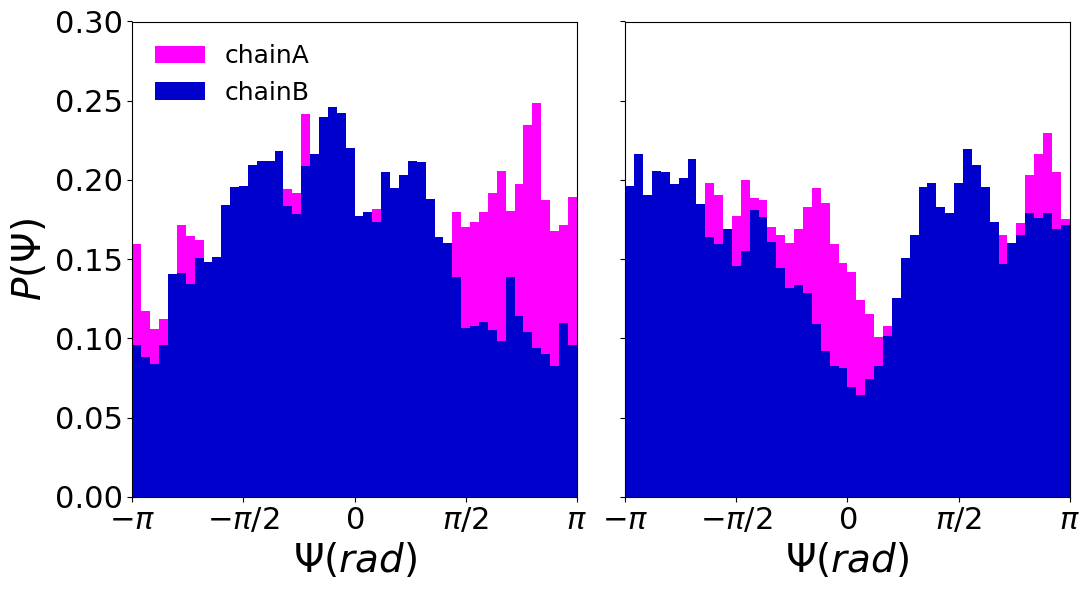

In [37]:
fig,ax = plt.subplots(1,2,figsize=(11,6),sharey=True)
# fig,ax = plt.subplots(1,3,figsize=(16,6),sharey=True)

nbins=50
al=1.0
f_size=28
t_size = 22
leg_size=18

cl2 = 'mediumblue'
cl1='magenta'

#Plot 3D data
ax[0].hist(master_data3D['YawA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
ax[0].hist(master_data3D['YawB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')

ax[1].hist(master_data2D['YawA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
ax[1].hist(master_data2D['YawB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')

# ax[2].hist(master_data_pseudo['YawA'],bins=nbins,density=True,alpha=al,color=cl1,label='chainA')
# ax[2].hist(master_data_pseudo['YawB'],bins=nbins,density=True,alpha=al,color=cl2,label='chainB')


ax[0].legend(fontsize=leg_size,frameon=False,loc='upper left')
ax[0].set_ylabel(r'$ P(\Psi)$',fontsize=f_size)
ax[0].set_ylim(0,0.3)
for ax_ in ax:
    ax_.set_xlabel(r'$ \Psi (rad)$',fontsize=f_size)
    # ax_.set_ylabel(r'$ P(\Psi)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
    ax_.set_xlim(-math.pi,math.pi)
    ax_.set_xticks([-math.pi,-math.pi/2,0,math.pi/2,math.pi])
    ax_.set_xticklabels([r'$-\pi$',r'$-\pi/{2}$',r'$0$',r'$\pi/{2}$',r'$\pi$'])
fig.tight_layout()
# plt.savefig('Yaw_FINAL_Mart2.eps', dpi=600,format='eps',transparent=True)
# plt.savefig('Yaw_FINAL_Mart2.png', dpi=600,format='png',transparent=True)


## Plotting distributions for Bound and Unbound states for only one Monomer

In [38]:
bd_mask = (master_data3D['d1'] <= 13.0) & (master_data3D['d2'] <= 13.0)
unb_mask = (master_data3D['d1'] > 13.0) & (master_data3D['d2'] > 13.0)

bd_data3D = master_data3D[bd_mask]
unb_data3D = master_data3D[unb_mask]

bd_mask = (master_data2D['d1'] <= 13.0) & (master_data2D['d2'] <= 13.0)
unb_mask = (master_data2D['d1'] > 13.0) & (master_data2D['d2'] > 13.0)

bd_data2D = master_data2D[bd_mask]
unb_data2D = master_data2D[unb_mask]




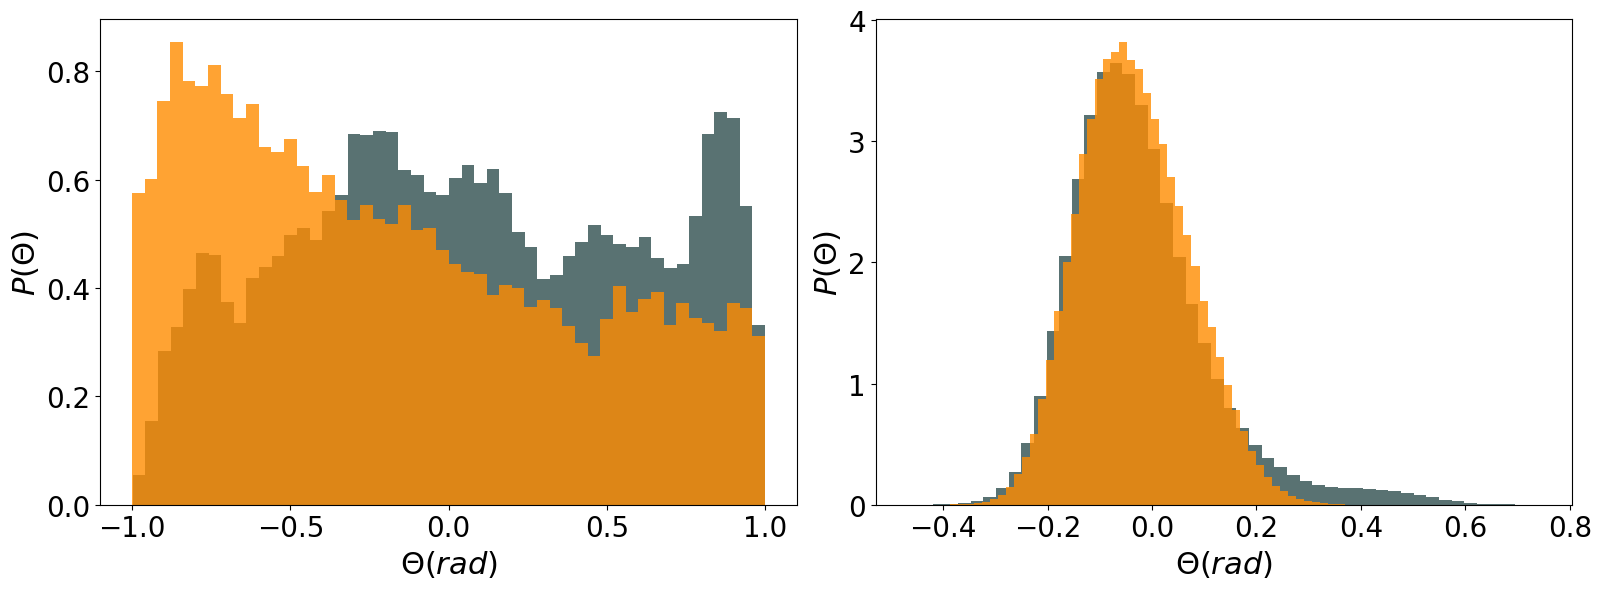

In [39]:
fig,ax = plt.subplots(1,2,figsize=(16,6))

nbins=50
al=0.8
f_size=22
t_size = 20
leg_size=16

cl2 = 'darkorange'
cl1='darkslategrey'

#Plot 3D data
ax[0].hist(np.sin(bd_data3D['PitchA']),bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(np.sin(unb_data3D['PitchA']),bins=nbins,density=True,alpha=al,color=cl2)

ax[1].hist(bd_data2D['PitchA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[1].hist(unb_data2D['PitchA'],bins=nbins,density=True,alpha=al,color=cl2)


for ax_ in ax:
    ax_.set_xlabel(r'$ \Theta (rad)$',fontsize=f_size)
    ax_.set_ylabel(r'$ P(\Theta)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
fig.tight_layout()

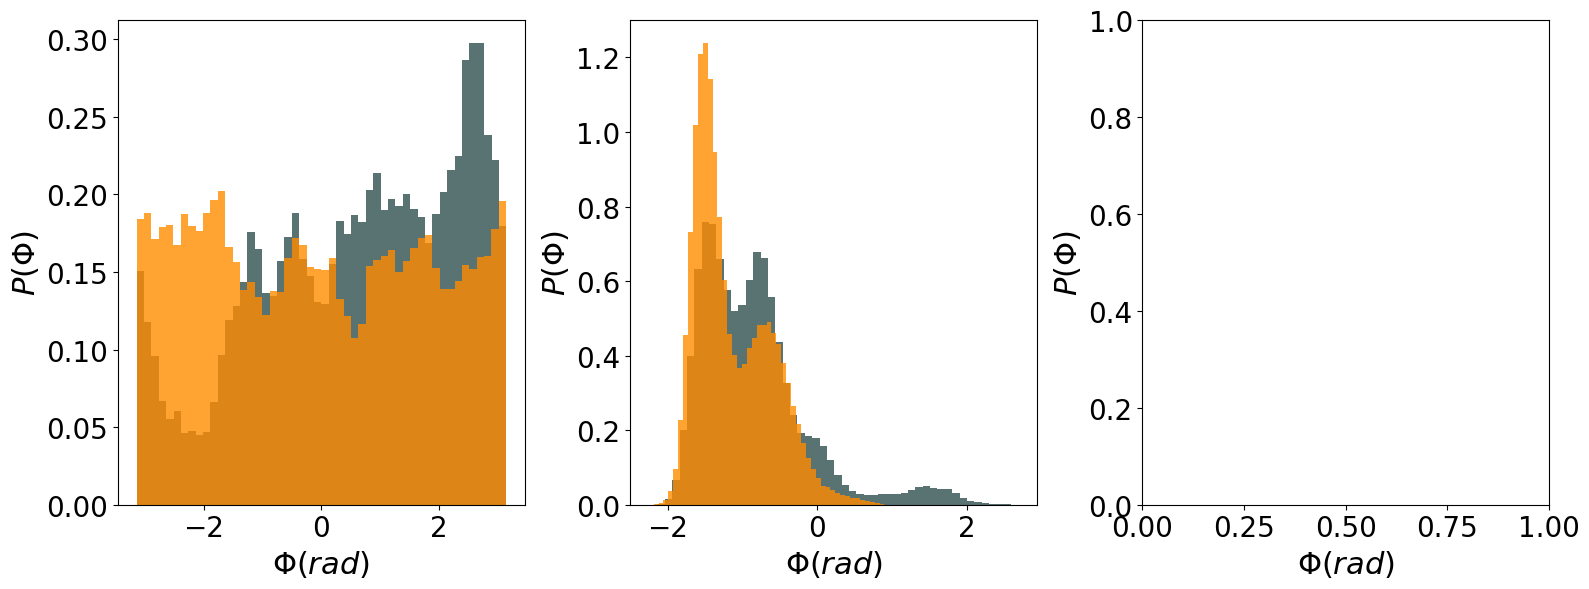

In [40]:
fig,ax = plt.subplots(1,3,figsize=(16,6))

nbins=50
al=0.8
f_size=22
t_size = 20
leg_size=16

cl2 = 'darkorange'
cl1='darkslategrey'

#Plot 3D data
ax[0].hist(bd_data3D['RollA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(unb_data3D['RollA'],bins=nbins,density=True,alpha=al,color=cl2)

ax[1].hist(bd_data2D['RollA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[1].hist(unb_data2D['RollA'],bins=nbins,density=True,alpha=al,color=cl2)

# ax[2].hist(bd_data_pseudo['RollA'],bins=nbins,density=True,alpha=al,color=cl1);
# ax[2].hist(unb_data_pseudo['RollA'],bins=nbins,density=True,alpha=al,color=cl2);

for ax_ in ax:
    ax_.set_xlabel(r'$ \Phi (rad)$',fontsize=f_size)
    ax_.set_ylabel(r'$ P(\Phi)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
fig.tight_layout()

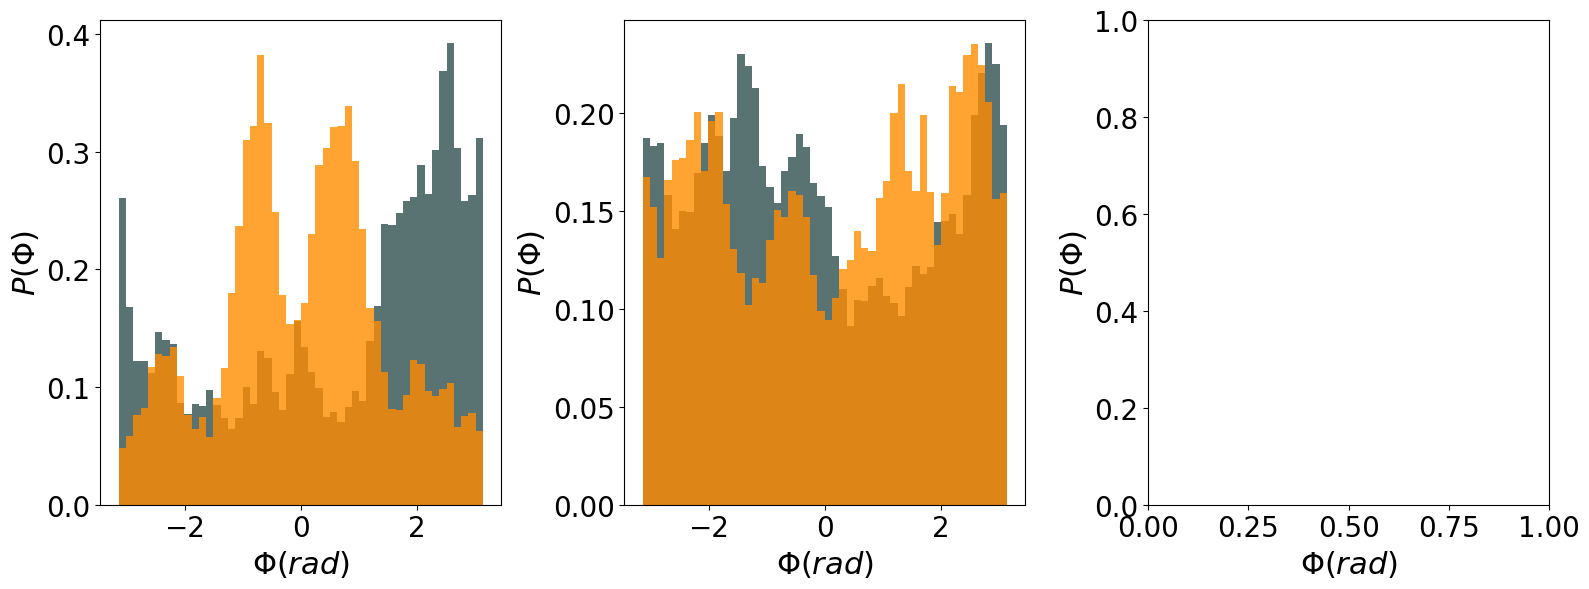

In [41]:
fig,ax = plt.subplots(1,3,figsize=(16,6))

nbins=50
al=0.8
f_size=22
t_size = 20
leg_size=16

cl2 = 'darkorange'
cl1='darkslategrey'

#Plot 3D data
ax[0].hist(bd_data3D['YawA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[0].hist(unb_data3D['YawA'],bins=nbins,density=True,alpha=al,color=cl2)

ax[1].hist(bd_data2D['YawA'],bins=nbins,density=True,alpha=al,color=cl1)
ax[1].hist(unb_data2D['YawA'],bins=nbins,density=True,alpha=al,color=cl2)

# ax[2].hist(bd_data_pseudo['YawA'],bins=nbins,density=True,alpha=al,color=cl1);
# ax[2].hist(unb_data_pseudo['YawA'],bins=nbins,density=True,alpha=al,color=cl2);

for ax_ in ax:
    ax_.set_xlabel(r'$ \Phi (rad)$',fontsize=f_size)
    ax_.set_ylabel(r'$ P(\Phi)$',fontsize=f_size)
    ax_.tick_params(axis='both',labelsize=t_size)
fig.tight_layout()

Text(0, 0.5, 'Angle (rad)')

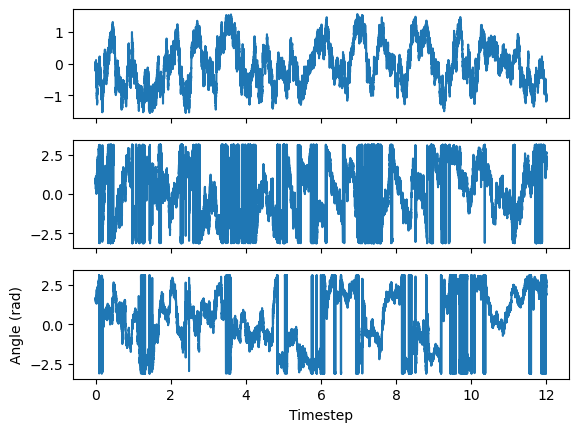

In [42]:
### Time dependent plots

fig,ax = plt.subplots(3,1, sharex=True)

ax[0].plot(master_data3D['Timestep']/1e6,master_data3D['PitchA'],label='PitchA')
ax[1].plot(master_data3D['Timestep']/1e6,master_data3D['RollA'],label='RollA')
ax[2].plot(master_data3D['Timestep']/1e6,master_data3D['YawA'],label='YawA')

ax[2].set_xlabel("Timestep")
ax[2].set_ylabel("Angle (rad)")



## Integration of Euler ANgles


In [43]:
def integrate_pitch(xvalues,low_lim,upp_lim,norm_mode = 'avg'):

    radian_val = np.sin(xvalues)
    low_lim =low_lim
    upp_lim = upp_lim
    nbins=100
    sin_histo = np.histogram(radian_val,bins=nbins)
   
    dtheta = sin_histo[1][1]-sin_histo[1][0]    #bin size
    mask2 = (sin_histo[1][1:] > low_lim)  & (sin_histo[1][1:] <= upp_lim)     #Integration limits
    integral = np.sum(dtheta*sin_histo[0][mask2])    # Sum of all values in the integration area = Ni*bin_size
    
    if norm_mode == 'avg':
        integral = integral/np.mean(sin_histo[0][mask2])
    elif norm_mode == 'max':
        integral = integral/np.max(sin_histo[0][mask2])
    return(integral)

def integrate_roll(xvalues,low_lim,upp_lim, norm_mode = 'avg'):
    radian_val = xvalues
    low_lim = low_lim
    upp_lim = upp_lim
    xhisto = np.histogram(radian_val,bins=500)
    
    dtheta = xhisto[1][1]-xhisto[1][0]    #bin size
    mask2 = (xhisto[1][1:] > low_lim)  & (xhisto[1][1:] <= upp_lim)     #Integration limits
    integral = np.sum(dtheta*xhisto[0][mask2])   # Sum of all values in the integration area = Ni*bin_size
    
    if norm_mode == 'avg':
        integral = integral/np.mean(xhisto[0][mask2])
    elif norm_mode == 'max':
        integral = integral/np.max(xhisto[0][mask2])
    return(integral)

def integrate_yaw(xvalues,low_lim,upp_lim,norm_mode='avg'):
    radian_val = xvalues
    low_lim = low_lim
    upp_lim = upp_lim
    xhisto = np.histogram(radian_val,bins=500)
    
    dtheta = xhisto[1][1]-xhisto[1][0]    #bin size
    mask2 = (xhisto[1][1:] > low_lim)  & (xhisto[1][1:] <= upp_lim)     #Integration limits
    integral = np.sum(dtheta*xhisto[0][mask2])    # Sum of all values in the integration area = Ni*bin_size
    
    if norm_mode == 'avg':
        integral = integral/np.mean(xhisto[0][mask2])
    elif norm_mode == 'max':
        integral = integral/np.max(xhisto[0][mask2])
    return(integral)

def integrate_deltaz(xvalues):
    mask = (xvalues >0.5) & (xvalues < 2.0)
    xhisto = np.histogram(xvalues[mask],bins=100)
    dz = xhisto[1][1]-xhisto[1][0]    #bin size
    integral = np.sum(dz*xhisto[0])/np.max(xhisto[0])    # Sum of all values in the integration area = Ni*bin_size
    return(integral)



In [44]:
def integrate_Eulers3D(data,low_lim,upp_lim):

    nbins = 100
    #INtegrating pitch
    phistA,binsA = np.histogram(data['PitchA'],bins=nbins)
    phistB,binsB = np.histogram(data['PitchB'],bins=nbins)

    dtheta_A = binsA[1]-binsA[0]
    mask1 = (phistA[1][1:] > low_lim)  & (phistB[1][1:] <= upp_lim)
    pitchA_int = np.sum(dtheta_A*phistA[mask1])/np.max(phistA)

    dtheta_B = binsB[1]-binsB[0]
    mask2 = (phistB[1][1:] > low_lim)  & (phistB[1][1:] <= upp_lim)
    pitchB_int = np.sum(dtheta_B*phistB[mask2])/np.max(phistB)

    #Integrating Roll
    low_lim, upp_lim = -1*np.pi, np.pi
    rhistA,binsA = np.histogram(data['RollA'],bins=nbins)
    rhistB,binsB = np.histogram(data['RollB'],bins=nbins)
    
    dphi_A = binsA[1]-binsA[0]
    mask1 = (rhistA[1][1:] > low_lim)  & (rhistB[1][1:] <= upp_lim)
    rollA_int = np.sum(dphi_A*rhistA[mask1])/np.max(rhistA)

    dphi_B = binsB[1]-binsB[0]

In [45]:
## Pitch Integral

## 3D 
pitchInt_bd3D_A = integrate_pitch(bd_data3D['PitchA'],-1*np.pi,1*np.pi)
pitchInt_unb3D_A = integrate_pitch(unb_data3D['PitchA'],-1*np.pi,1*np.pi)

pitchInt_bd3D_B = integrate_pitch(bd_data3D['PitchB'],-1*np.pi,1*np.pi)
pitchInt_unb3D_B = integrate_pitch(unb_data3D['PitchB'],-1*np.pi,1*np.pi)

## 2D
pitchInt_bd2D_A = integrate_pitch(bd_data2D['PitchA'],-1*np.pi,1*np.pi,norm_mode='max')
pitchInt_unb2D_A = integrate_pitch(unb_data2D['PitchA'],-1*np.pi,1*np.pi,norm_mode='max')

pitchInt_bd2D_B = integrate_pitch(bd_data2D['PitchB'],-1*np.pi,1*np.pi,norm_mode='max')
pitchInt_unb2D_B = integrate_pitch(unb_data2D['PitchB'],-1*np.pi,1*np.pi,norm_mode='max')

# ## Pseudo Membrane
# pitchInt_bdPseudo_A = integrate_pitch(bd_data_pseudo['PitchA'],-1*np.pi,1*np.pi,norm_mode='max')
# pitchInt_unbPseudo_A = integrate_pitch(unb_data_pseudo['PitchA'],-1*np.pi,1*np.pi,norm_mode='max')

# pitchInt_bdPseudo_B = integrate_pitch(bd_data_pseudo['PitchB'],-1*np.pi,1*np.pi,norm_mode='max')
# pitchInt_unbPseudo_B = integrate_pitch(unb_data_pseudo['PitchB'],-1*np.pi,1*np.pi,norm_mode='max')

## Roll Integral
## 3D 
rollInt_bd3D_A = integrate_roll(bd_data3D['RollA'],-1*np.pi,1*np.pi)
rollInt_unb3D_A = integrate_roll(unb_data3D['RollA'],-1*np.pi,1*np.pi)

rollInt_bd3D_B = integrate_roll(bd_data3D['RollB'],-1*np.pi,1*np.pi)
rollInt_unb3D_B = integrate_roll(unb_data3D['RollB'],-1*np.pi,1*np.pi)

## 2D
rollInt_bd2D_A = integrate_roll(bd_data2D['RollA'],-1*np.pi,1*np.pi,norm_mode='max')
rollInt_unb2D_A = integrate_roll(unb_data2D['RollA'],-1*np.pi,1*np.pi,norm_mode='max')

rollInt_bd2D_B = integrate_roll(bd_data2D['RollB'],-1*np.pi,1*np.pi,norm_mode='max')
rollInt_unb2D_B = integrate_roll(unb_data2D['RollB'],-1*np.pi,1*np.pi,norm_mode='max')

# ## Pseudo Membrane
# rollInt_bdPseudo_A = integrate_roll(bd_data_pseudo['RollA'],-1*np.pi,1*np.pi,norm_mode='max')
# rollInt_unbPseudo_A = integrate_roll(unb_data_pseudo['RollA'],-1*np.pi,1*np.pi,norm_mode='max')

# rollInt_bdPseudo_B = integrate_roll(bd_data_pseudo['RollB'],-1*np.pi,1*np.pi,norm_mode='max')
# rollInt_unbPseudo_B = integrate_roll(unb_data_pseudo['RollB'],-1*np.pi,1*np.pi,norm_mode='max')

## Yaw Integral

## 3D 
yawInt_bd3D_A = integrate_yaw(bd_data3D['YawA'],-1*np.pi,1*np.pi)
yawInt_unb3D_A = integrate_yaw(unb_data3D['YawA'],-1*np.pi,1*np.pi)

yawInt_bd3D_B = integrate_yaw(bd_data3D['YawB'],-1*np.pi,1*np.pi)
yawInt_unb3D_B = integrate_yaw(unb_data3D['YawB'],-1*np.pi,1*np.pi)

## 2D
yawInt_bd2D_A = integrate_yaw(bd_data2D['YawA'],-1*np.pi,1*np.pi)
yawInt_unb2D_A = integrate_yaw(unb_data2D['YawA'],-1*np.pi,1*np.pi)

yawInt_bd2D_B = integrate_yaw(bd_data2D['YawB'],-1*np.pi,1*np.pi)
yawInt_unb2D_B = integrate_yaw(unb_data2D['YawB'],-1*np.pi,1*np.pi)

# ## Pseudo Membrane
# yawInt_bdPseudo_A = integrate_yaw(bd_data_pseudo['YawA'],-1*np.pi,1*np.pi)
# yawInt_unbPseudo_A = integrate_yaw(unb_data_pseudo['YawA'],-1*np.pi,1*np.pi)

# yawInt_bdPseudo_B = integrate_yaw(bd_data_pseudo['YawB'],-1*np.pi,1*np.pi)
# yawInt_unbPseudo_B = integrate_yaw(unb_data_pseudo['YawB'],-1*np.pi,1*np.pi)

In [46]:
print("-----------------Pitch Integral-----------------")
print("%10s %10s %10s %10s " %('State','3D','2D','Pseudo'))
print("---------------------------------------------------")
print("%10s %10.3f %10.3f " %('Bound',pitchInt_bd3D_A,pitchInt_bd2D_A))
print("%10s %10.3f %10.3f " %('Unbound',pitchInt_unb3D_A,pitchInt_unb2D_A))
print("---------------------------------------------------")

print("-----------------Roll Integral-----------------")
print("%10s %10s %10s %10s " %('State','3D','2D','Pseudo'))
print("---------------------------------------------------")
print("%10s %10.3f %10.3f " %('Bound',rollInt_bd3D_A,rollInt_bd2D_A))
print("%10s %10.3f %10.3f " %('Unbound',rollInt_unb3D_A,rollInt_unb2D_A))
print("---------------------------------------------------")

print("-----------------Yaw Integral-----------------")
print("%10s %10s %10s %10s " %('State','3D','2D','Pseudo'))
print("---------------------------------------------------")
print("%10s %10.3f %10.3f " %('Bound',yawInt_bd3D_A,yawInt_bd2D_A))
print("%10s %10.3f %10.3f " %('Unbound',yawInt_unb3D_A,yawInt_unb2D_A))
print("---------------------------------------------------")



-----------------Pitch Integral-----------------
     State         3D         2D     Pseudo 
---------------------------------------------------
     Bound      1.998      0.273 
   Unbound      2.000      0.264 
---------------------------------------------------
-----------------Roll Integral-----------------
     State         3D         2D     Pseudo 
---------------------------------------------------
     Bound      6.283      1.275 
   Unbound      6.282      0.773 
---------------------------------------------------
-----------------Yaw Integral-----------------
     State         3D         2D     Pseudo 
---------------------------------------------------
     Bound      6.283      6.283 
   Unbound      6.282      6.283 
---------------------------------------------------


In [48]:
## Printing for chain B

print("-----------------Pitch Integral-----------------")
print("%10s %10s %10s %10s " %('State','3D','2D','Pseudo'))
print("---------------------------------------------------")
print("%10s %10.3f %10.3f " %('Bound',pitchInt_bd3D_B,pitchInt_bd2D_B))
print("%10s %10.3f %10.3f " %('Unbound',pitchInt_unb3D_B,pitchInt_unb2D_B))
print("---------------------------------------------------")

print("-----------------Roll Integral-----------------")
print("%10s %10s %10s %10s " %('State','3D','2D','Pseudo'))
print("---------------------------------------------------")
print("%10s %10.3f %10.3f " %('Bound',rollInt_bd3D_B,rollInt_bd2D_B))
print("%10s %10.3f %10.3f " %('Unbound',rollInt_unb3D_B,rollInt_unb2D_B))
print("---------------------------------------------------")

print("-----------------Yaw Integral-----------------")
print("%10s %10s %10s %10s " %('State','3D','2D','Pseudo'))
print("---------------------------------------------------")
print("%10s %10.3f %10.3f " %('Bound',yawInt_bd3D_B,yawInt_bd2D_B))
print("%10s %10.3f %10.3f " %('Unbound',yawInt_unb3D_B,yawInt_unb2D_B))
print("---------------------------------------------------")



-----------------Pitch Integral-----------------
     State         3D         2D     Pseudo 
---------------------------------------------------
     Bound      2.000      0.306 
   Unbound      2.000      0.215 
---------------------------------------------------
-----------------Roll Integral-----------------
     State         3D         2D     Pseudo 
---------------------------------------------------
     Bound      6.283      1.363 
   Unbound      6.282      0.649 
---------------------------------------------------
-----------------Yaw Integral-----------------
     State         3D         2D     Pseudo 
---------------------------------------------------
     Bound      6.281      6.283 
   Unbound      6.283      6.283 
---------------------------------------------------


In [ ]:
h = pitchInt_unb2D_B*
print("LenghtScale 'h' value = ", )